In [5]:

# Testing Code

# Import necessary libraries
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model = tf.keras.models.load_model('shape_classifier_model.h5')
print("Model loaded successfully!")

# Define the class names (ensure the order matches training)
class_names = ['cylinder', 'hexagon']  # Updated class names

# Define the function
def predict_and_display(image_path):
    """
    Predict the class of the input image, display edges, and the original image with the class name.

    Parameters:
        image_path (str): Path to the input image.
    """
    # Load and preprocess the test image
    test_img = image.load_img(image_path, target_size=(128, 128))
    test_img_array = image.img_to_array(test_img) / 255.0
    test_img_array_expanded = np.expand_dims(test_img_array, axis=0)

    # Predict the class
    predictions = model.predict(test_img_array_expanded)
    predicted_class = np.argmax(predictions)
    predicted_label = class_names[predicted_class]

    # Display the edges
    gray_img = cv2.cvtColor(np.uint8(test_img_array * 255), cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray_img, threshold1=100, threshold2=200)

    # Plot the results
    plt.figure(figsize=(12, 6))

    # First Output: Edges
    plt.subplot(1, 2, 1)
    plt.title("Edges")
    plt.imshow(edges, cmap='gray')
    plt.axis('off')

    # Second Output: Original Image with Class Name
    plt.subplot(1, 2, 2)
    plt.title(predicted_label)
    plt.imshow(np.uint8(test_img_array * 255).astype(np.uint8))
    plt.axis('off')

    # Show the outputs
    plt.tight_layout()
    plt.show()


Model loaded successfully!


1/1 [==============================] - 0s 22ms/step


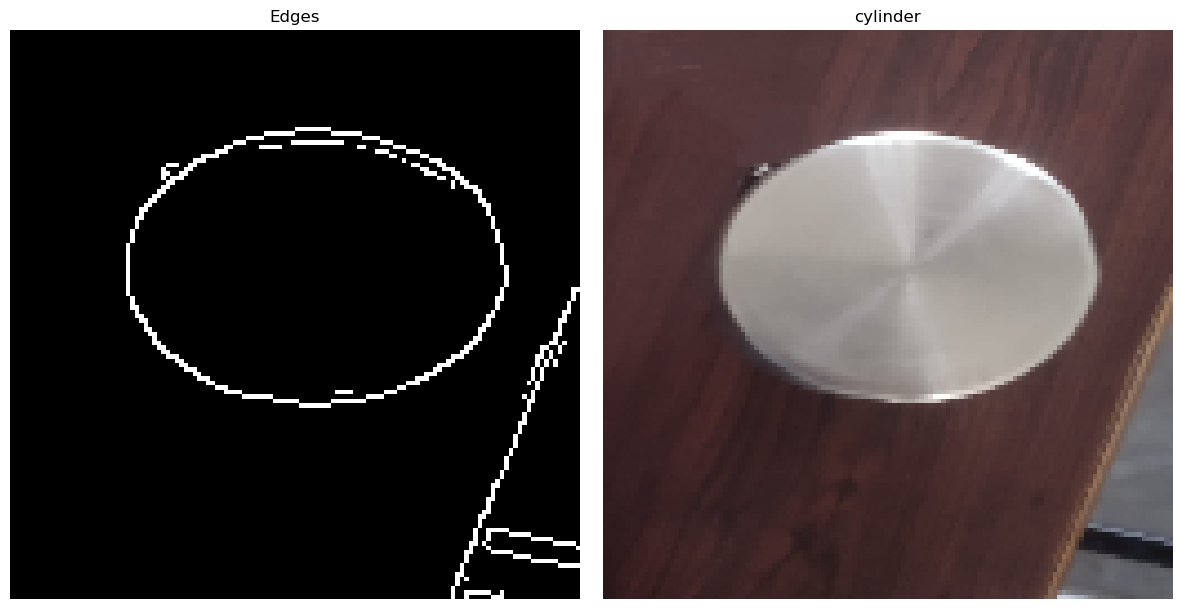

None


In [7]:
img = predict_and_display(r'C:\Users\seeth\Desktop\hexagonal_1\1\1.jpg')
print(img)